# **HR Absenteesim Code**

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing Raw Data

In [ ]:
df=pd.read_csv("MFGEmployees4.csv")

In [ ]:
df.head(100)

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores
5,6,Jones,Ernie,M,Richmond,Baker,Bakery,Richmond,Stores,48.440311,2.717692,81.830079,Stores
6,7,Buford,Ralph,M,Vancouver,Accounting Clerk,Accounting,Vancouver,FinanceAndAccounting,50.752730,10.157918,60.495072,HeadOffice
7,8,Lee,Gregory,M,Sechelt,Baker,Bakery,West Vancouver,Stores,36.216031,4.432123,30.072902,Stores
8,9,Smith,Jerry,M,New Westminster,Baker,Bakery,New Westminster,Stores,58.427380,6.940121,181.630819,Stores
9,10,Beard,Robert,M,Vancouver,Accounting Clerk,Accounting,Vancouver,FinanceAndAccounting,39.853980,13.848321,30.664408,HeadOffice


## Exploring the data

In [ ]:
#No Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EmployeeNumber  8336 non-null   int64  
 1   Surname         8336 non-null   object 
 2   GivenName       8336 non-null   object 
 3   Gender          8336 non-null   object 
 4   City            8336 non-null   object 
 5   JobTitle        8336 non-null   object 
 6   DepartmentName  8336 non-null   object 
 7   StoreLocation   8336 non-null   object 
 8   Division        8336 non-null   object 
 9   Age             8336 non-null   float64
 10  LengthService   8336 non-null   float64
 11  AbsentHours     8336 non-null   float64
 12  BusinessUnit    8336 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 846.8+ KB


In [ ]:
df.describe()

,EmployeeNumber,Age,LengthService,AbsentHours
count,8336.000000,8336.000000,8336.000000,8336.000000
mean,4168.500000,42.007086,4.782910,61.283978
std,2406.540255,9.939798,2.462990,49.038365
min,1.000000,3.504743,0.012098,0.000000
25%,2084.750000,35.298748,3.575892,19.127590
50%,4168.500000,42.114924,4.600248,56.005808
75%,6252.250000,48.666943,5.623922,94.284692
max,8336.000000,77.938003,43.735239,272.530123


Data Cleaning

In [ ]:
df=df.drop(df[df['Age']<18].index,axis=0)

In [ ]:
df=df.drop(df[df['Age']>65].index,axis=0)

In [ ]:
#df.EmployeeNumber.value_counts()
#No Duplicate employee number found

Removing the EmployeeNumber,Surname and GivenName columns as they don't seem to be significant

In [ ]:
df=df.drop(['EmployeeNumber','Surname','GivenName'],axis=1)

## Univariate analysis

In [ ]:
df.head(100)

,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores
5,M,Richmond,Baker,Bakery,Richmond,Stores,48.440311,2.717692,81.830079,Stores
6,M,Vancouver,Accounting Clerk,Accounting,Vancouver,FinanceAndAccounting,50.752730,10.157918,60.495072,HeadOffice
7,M,Sechelt,Baker,Bakery,West Vancouver,Stores,36.216031,4.432123,30.072902,Stores
8,M,New Westminster,Baker,Bakery,New Westminster,Stores,58.427380,6.940121,181.630819,Stores
9,M,Vancouver,Accounting Clerk,Accounting,Vancouver,FinanceAndAccounting,39.853980,13.848321,30.664408,HeadOffice


Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

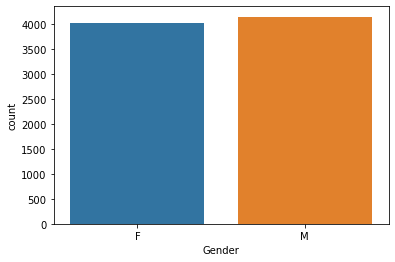

In [ ]:
sns.countplot(x=df.Gender,data=df)
#No imbalance found

City

In [ ]:
pd.options.display.max_rows=None
#df.City.value_counts()
#No duplicate,wrong names found

Job Title

In [ ]:
#df.JobTitle.value_counts()

The Job titles seem fine but we can still group all the managers,clerks,analyst and directors into their own respective groups.

In [ ]:
#Creating a function for that

In [ ]:
def jobtitles(j):
    if 'clerk' in j.lower():
        j='Clerk'
    if 'director' in j.lower():
        j='Director'
    if 'manager' in j.lower():
        j="Manager"
    if 'analyst' in j.lower():
        j='Analyst'
    if 'assistant' in j.lower():
        j='Assistant'
    if 'vp' in j.lower():
        j='VP'

    else:
        j=j
    return j

In [ ]:
#applying jobtitles function in df['JobTitle']
df['JobTitle']=df['JobTitle'].apply(jobtitles)

In [ ]:
#df['JobTitle'].value_counts()

Cashier                      1663
Dairy Person                 1476
Meat Cutter                  1461
Baker                        1375
Clerk                        1147
Shelf Stocker                 701
Manager                       216
Analyst                        50
Auditor                        14
Trainer                        14
Recruiter                      12
Benefits Admin                 11
Director                       11
Assistant                       5
VP                              3
Corporate Lawyer                3
CEO                             1
Legal Counsel                   1
CHief Information Officer       1
Name: JobTitle, dtype: int64

<AxesSubplot:xlabel='count', ylabel='JobTitle'>

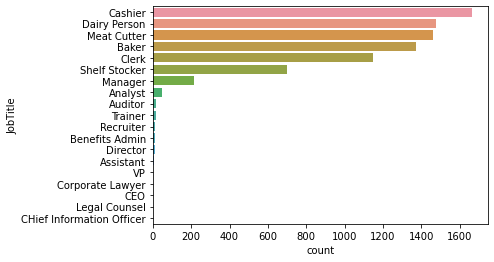

In [ ]:
sns.countplot(y=df['JobTitle'],data=df,order = df['JobTitle'].value_counts().index)

Department Name

In [ ]:
#df['DepartmentName'].value_counts()

Customer Service          1695
Meats                     1495
Dairy                     1477
Bakery                    1420
Produce                   1133
Processed Foods            735
Store Management            38
Accounting                  18
Accounts Receiveable        16
Audit                       15
Training                    15
Accounts Payable            15
HR Technology               14
Recruitment                 13
Employee Records            12
Labor Relations             12
Executive                   11
Information Technology      10
Compensation                 9
Investment                   9
Legal                        3
Name: DepartmentName, dtype: int64

<AxesSubplot:xlabel='count', ylabel='DepartmentName'>

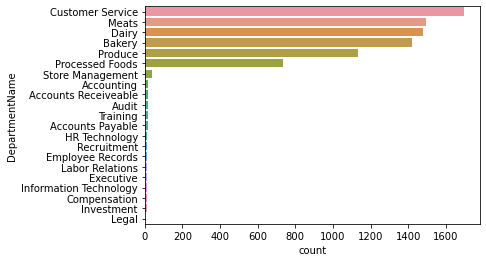

In [ ]:
sns.countplot(y=df['DepartmentName'],data=df,order = df['DepartmentName'].value_counts().index)

Store Location

In [ ]:
#df['StoreLocation'].value_counts()

Vancouver           1807
Victoria             837
Nanaimo              601
New Westminster      515
Kelowna              405
Kamloops             352
Prince George        347
Burnaby              336
Cranbrook            284
Surrey               257
Richmond             220
Terrace              192
Chilliwack           182
Langley              155
Trail                146
Vernon               143
Squamish             139
Abbotsford           127
Quesnel              125
Fort St John         119
West Vancouver       104
North Vancouver      102
Williams Lake         97
Aldergrove            90
Port Coquitlam        86
New Westminister      61
Fort Nelson           58
Nelson                55
Grand Forks           40
White Rock            36
Haney                 32
Princeton             27
Dawson Creek          23
Bella Bella           21
Ocean Falls           12
Pitt Meadows          12
Valemount              7
Cortes Island          7
Dease Lake             4
Blue River             2


<AxesSubplot:xlabel='count', ylabel='StoreLocation'>

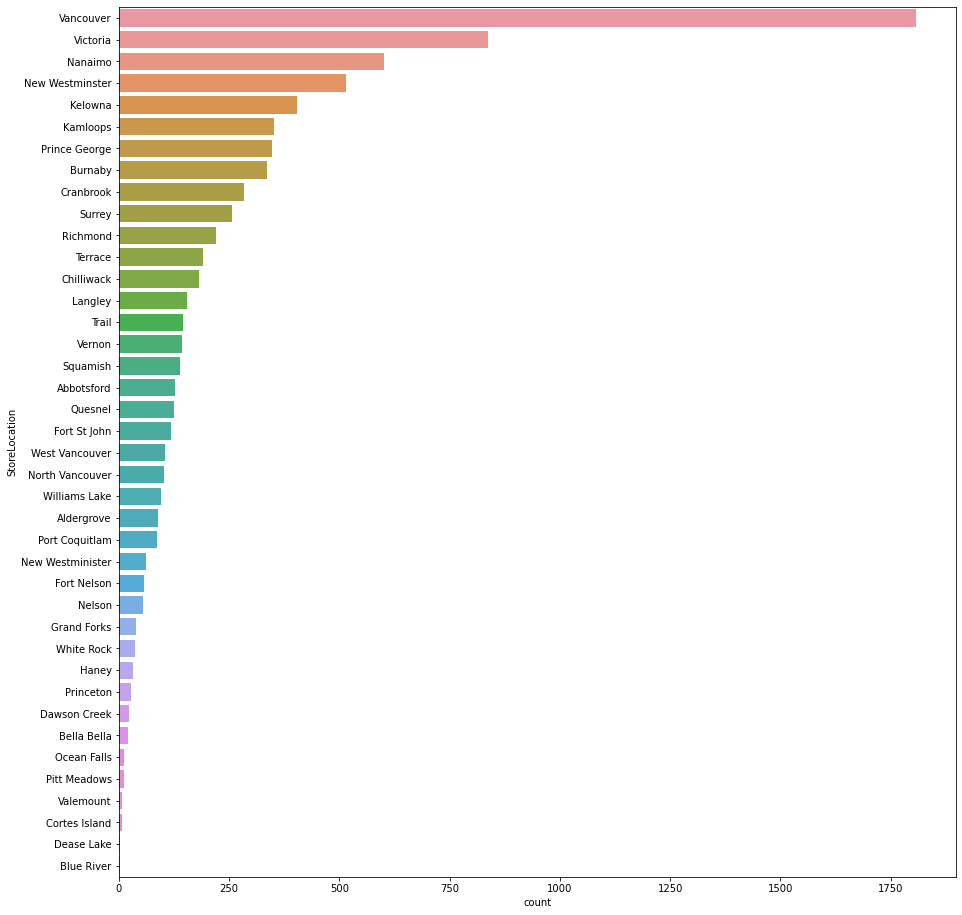

In [ ]:
plt.figure(figsize=(15,16))
sns.countplot(y=df['StoreLocation'],data=df,order = df['StoreLocation'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='Division'>

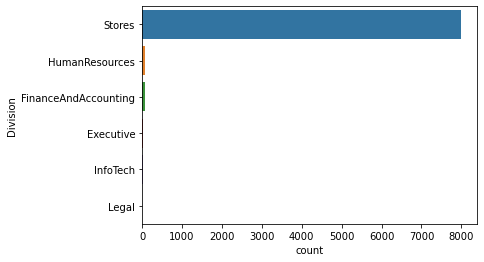

In [ ]:
sns.countplot(y=df['Division'],data=df,order = df['Division'].value_counts().index)

Business_Unit

<AxesSubplot:xlabel='count', ylabel='BusinessUnit'>

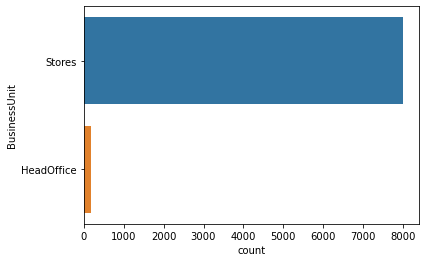

In [ ]:
sns.countplot(y=df['BusinessUnit'],data=df,order = df['BusinessUnit'].value_counts().index)

Age,Length of Servive and Absent Hours

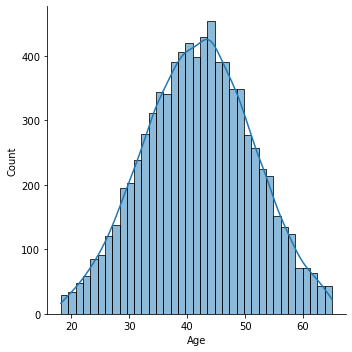

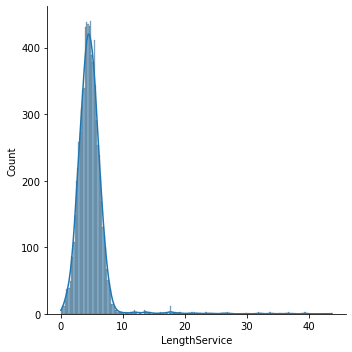

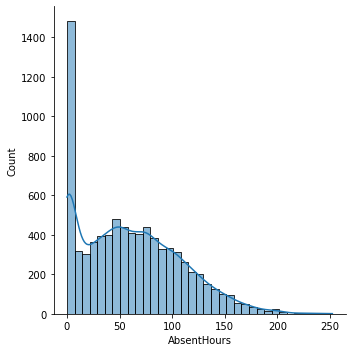

In [ ]:
print(sns.displot(df['Age'],kde=True))
print(sns.displot(df['LengthService'],kde=True))
print(sns.displot(df['AbsentHours'],kde=True))
#Age is a normal distribution
#Length of Service is also a normal distribution slightly skewed on right
#Whereas Absent Hours is a log normal distribution which means that only a few employee are absent
#for a longer period of time.

## Bivariate Analysis

In [ ]:
df.columns

Index(['Gender', 'City', 'JobTitle', 'DepartmentName', 'StoreLocation',
       'Division', 'Age', 'LengthService', 'AbsentHours', 'BusinessUnit'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='AbsentHours'>

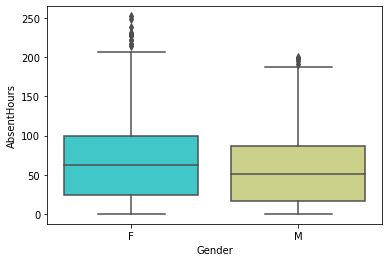

In [ ]:
#Gender
#Females tend to have a more Absent hours than men and also consists of more outliers
sns.boxplot(x='Gender',y='AbsentHours',data=df,palette='rainbow')

<AxesSubplot:xlabel='AbsentHours', ylabel='StoreLocation'>

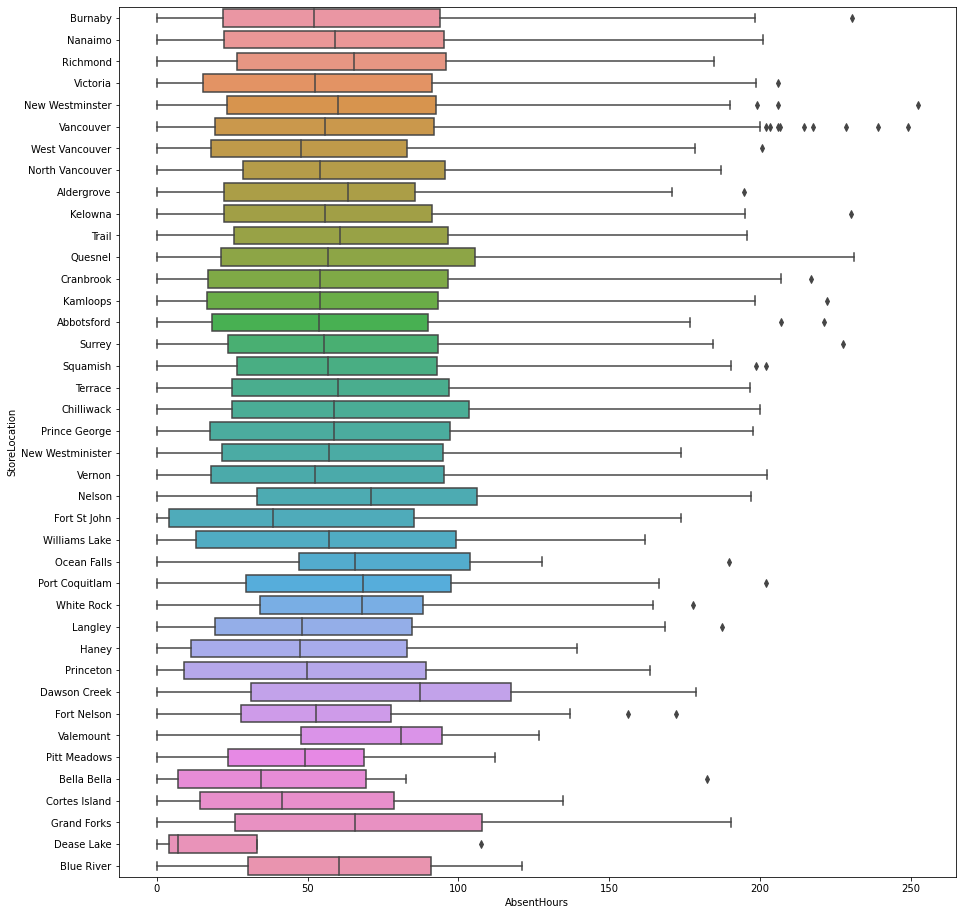

In [ ]:
#City
plt.figure(figsize=(15,16))
sns.boxplot(x='AbsentHours',y='StoreLocation',data=df)
#Vancouver seems to have many outliers(employees with very high Absent Hours)

<AxesSubplot:xlabel='AbsentHours', ylabel='JobTitle'>

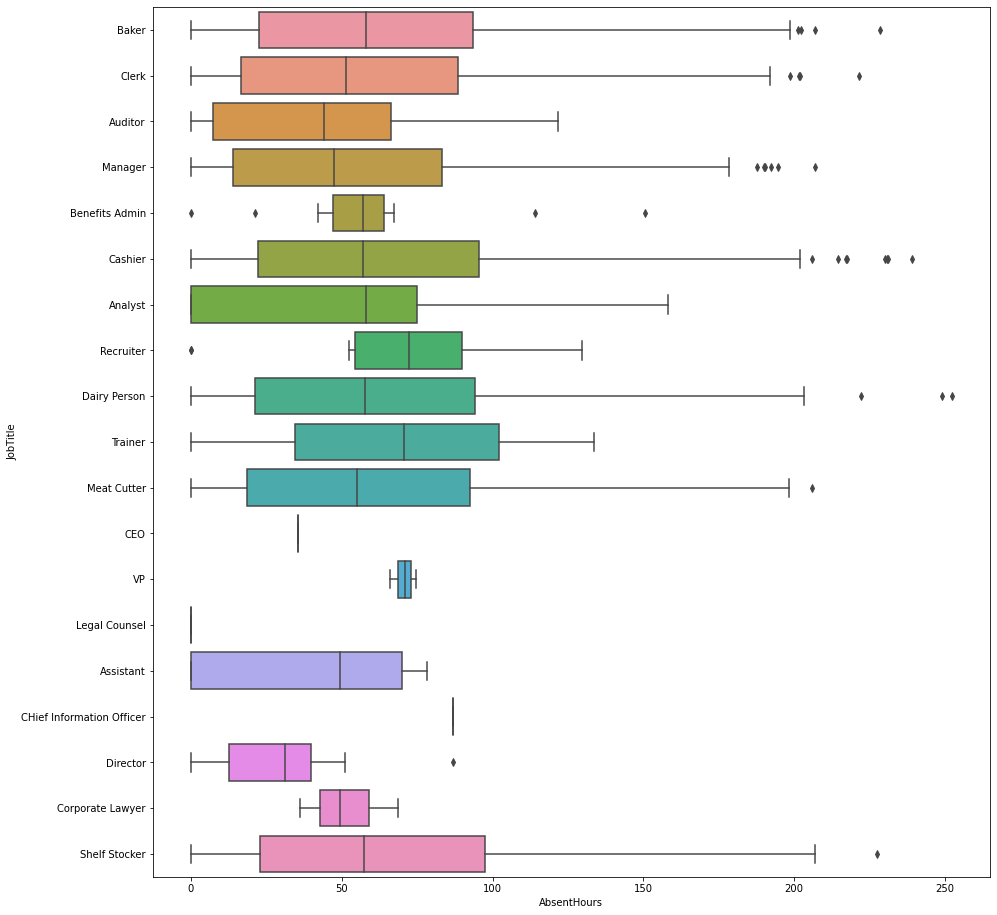

In [ ]:
plt.figure(figsize=(15,16))
sns.boxplot(x='AbsentHours',y='JobTitle',data=df)
#Recruiter,trainer and VP seem to have high median values of Absent Hours

<AxesSubplot:xlabel='AbsentHours', ylabel='DepartmentName'>

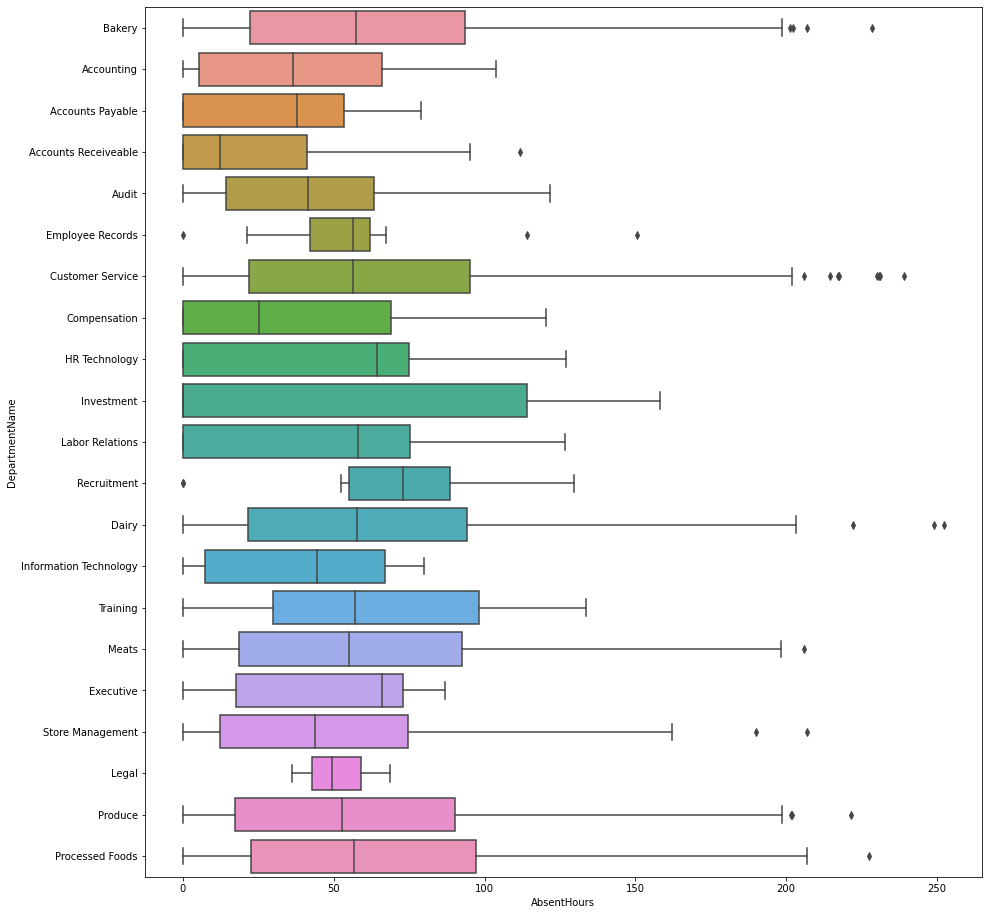

In [ ]:
#Department
plt.figure(figsize=(15,16))
sns.boxplot(x='AbsentHours',y='DepartmentName',data=df)

<AxesSubplot:xlabel='AbsentHours', ylabel='BusinessUnit'>

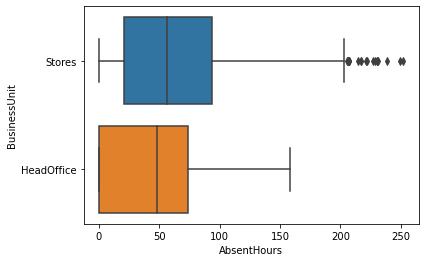

In [ ]:
#BusinessUnit
#Stores seem to have slightly longer absent hours than Head Office
sns.boxplot(x='AbsentHours',y='BusinessUnit',data=df)

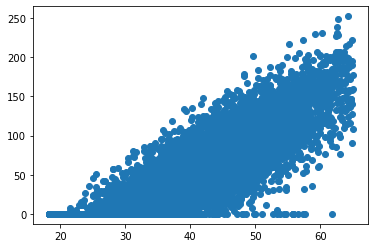

In [ ]:
#Age and Length of Service
plt.scatter(x=df['Age'],y=df['AbsentHours'])
#Absent Hours seem to be increasing in employee with more age

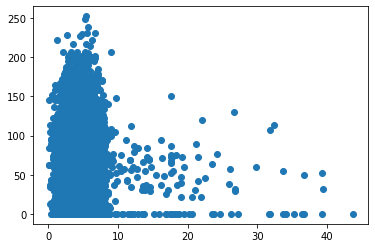

In [ ]:
plt.scatter(x=df['LengthService'],y=df['AbsentHours'])
#No significant relation between Absent Hours and Length of Service

## Correlation Matrix

<AxesSubplot:>

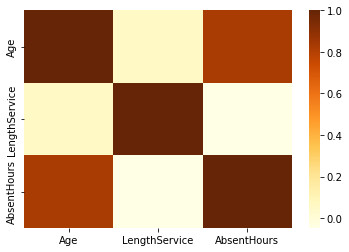

In [ ]:
sns.heatmap(df.corr(),cmap="YlOrBr")
#As we can see Absent Hours has a significant correlation with Age

In [ ]:
df.to_excel("AbsentHours.xlsx")